# **Project Name**    - Flipkart EDA Analysis



##### **Project Type**    - Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name** - Omkar Jadhav

# **Project Summary -**

In order to improve customer happiness, this project will examine consumer interactions and feedback at Flipkart, a well-known e-commerce site. Providing outstanding customer service is essential for fostering growth and preserving client loyalty in the face of increasing e-commerce competition. The dataset includes feedback and CSAT scores in addition to customer support contacts from many channels, including chat, phone, and email.

The primary objectives are to determine the critical elements that impact customer happiness, evaluate the effectiveness of customer support teams, and create plans to raise the caliber of services. The study aims to identify opportunities for improvement by examining trends in agent performance, issue resolution timeframes, and feedback. Key metrics such as handling time, time-to-resolution, and customer remarks are examined to evaluate the effectiveness of existing support strategies.

By improving these service-related KPIs, Flipkart will be able to address problems more quickly and offer support that is customized to meet the demands of a wide range of customers. CSAT scores will rise, support procedures will be streamlined, and agent performance will be optimized thanks to this analysis. In the end, these enhancements will promote sustainable growth in a fiercely competitive market, raise customer retention, and strengthen Flipkart's brand loyalty.

# **GitHub Link -**

https://github.com/Omkar2807/Data-Analysis/

# **Problem Statement**


One of the top e-commerce sites, Flipkart, aims to raise customer satisfaction (CSAT) through a variety of assistance avenues. However, it's unclear which important factors—like agent performance and issue resolution time—have an impact on CSAT. In order for Flipkart to improve customer loyalty in a cutthroat market, optimize support methods, and increase service efficiency, this project will evaluate customer interactions and feedback to uncover drivers of satisfaction.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd #for handling and data manupulation
import numpy as np #for mathematical operation
import matplotlib.pyplot as plt #for Data visualization
import seaborn as sns  #for Data visualization 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('Customer_support_data.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 85907
Number of columns: 20


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

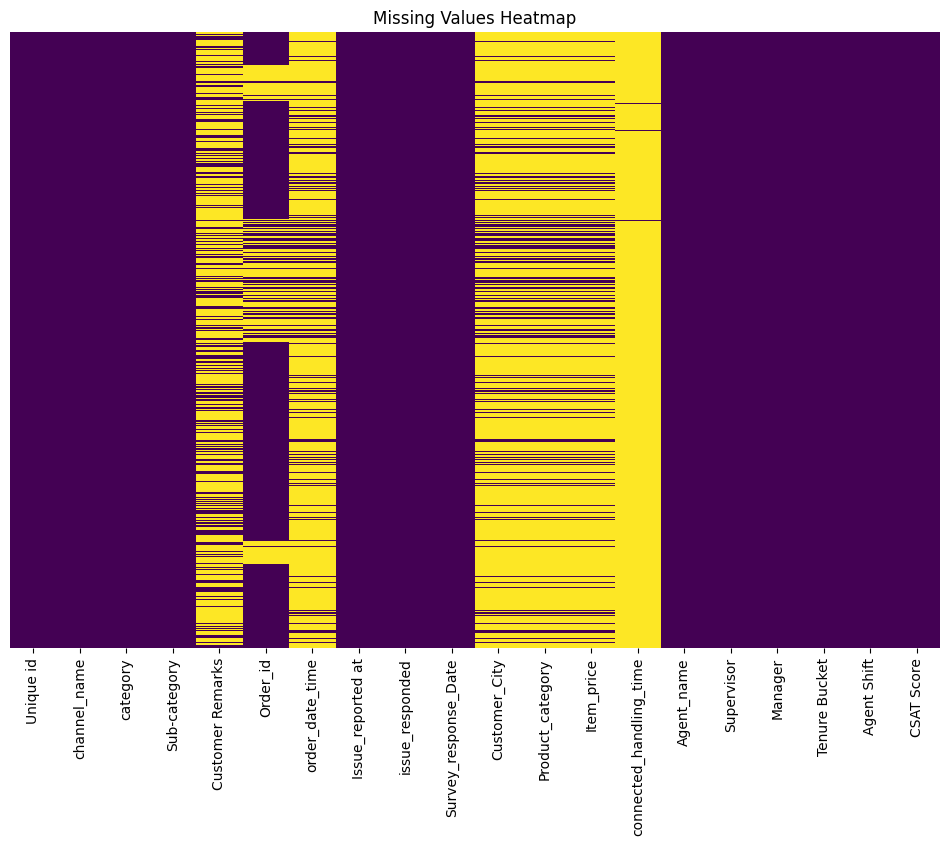

In [9]:
# Visualizing the missing values
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

The Flipkart Customer Service Satisfaction dataset captures customer interactions, feedback, and Satisfaction scores across various support channels at Flipkart.  It contains information on issues reported, order data, user feedback, and customer support channels. It includes both numerical and category data.Each record corresponds to a unique customer service case or ticket handled by Flipkart’s support agents.

***Dataset Structure:***

    The dataset contains 20 columns and several thousand records (rows) — each row representing a unique customer service interaction.
    
    Columns include categorical, numerical, datetime, and text data types.
    
    The target variable for classification is CSAT Score (Customer Satisfaction score).


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns.tolist()

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [11]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

***order_date_time*** : Date and time when the customer placed the order.

***Issue_reported at*** : Timestamp when the customer reported an issue.

***issue_responded*** : Timestamp when the customer service team responded to the issue.

***Survey_response_Date*** : Date when the customer submitted the satisfaction survey.

***Item_price*** : Price of the purchased product.

***connected_handling_time*** : Time (in seconds/minutes) taken by the agent to handle the issue after 
connecting with the customer.

***CSAT Score*** : Customer Satisfaction rating (typically from 1 to 5).

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Create a new column time difference to find the time taken to respond
# Convert columns to datetime with the correct format

df ['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d-%m-%Y %H:%M') 
df ['issue_responded'] = pd. to_datetime(df['issue_responded'], format='%d-%m-%Y %H:%M')

# Format the datetime columns to the desired format
df ['Issue_reported at (formatted)'] = df ['Issue_reported at'].dt.strftime('%d-%m-%Y')
df ['issue_responded (formatted)'] = df['issue_responded'].dt.strftime('%d-%m-%Y')

#Calculate the time diffrence and convert to minutes
df['Time difference'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Issue_reported at (formatted),issue_responded (formatted),Time difference
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,...,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,01-08-2023,01-08-2023,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,...,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,01-08-2023,01-08-2023,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,...,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,01-08-2023,01-08-2023,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,...,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,01-08-2023,01-08-2023,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,...,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,01-08-2023,01-08-2023,2.0


In [14]:
# Remove columns that have a lot of null values
rem_columns = ['order_date_time', 'Customer Remarks', 'connected_handling_time']

# Check which columns are present in the DataFrame
existing_columns_to_remove = [col for col in rem_columns if col in df.columns]

# Remove the columns if they are present
if existing_columns_to_remove:
    df = df.drop(columns=existing_columns_to_remove)
    print(f"Columns {existing_columns_to_remove} have been removed.")
else:
    print("None of the specified columns are present in the DataFrame or already been removed")

Columns ['order_date_time', 'Customer Remarks', 'connected_handling_time'] have been removed.


### What all manipulations have you done and insights you found?

Converted the date and time columns (Issue_reported at, issue_responded) into proper datetime format and calculated the time difference in minutes to measure response time. 

Also formatted the datetime columns for better readability and removed high-null columns (order_date_time, Customer Remarks, connected_handling_time) to clean the dataset. 

This helped make the data analysis-ready and revealed that response times varied significantly, indicating differences in efficiency among agents or shifts.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

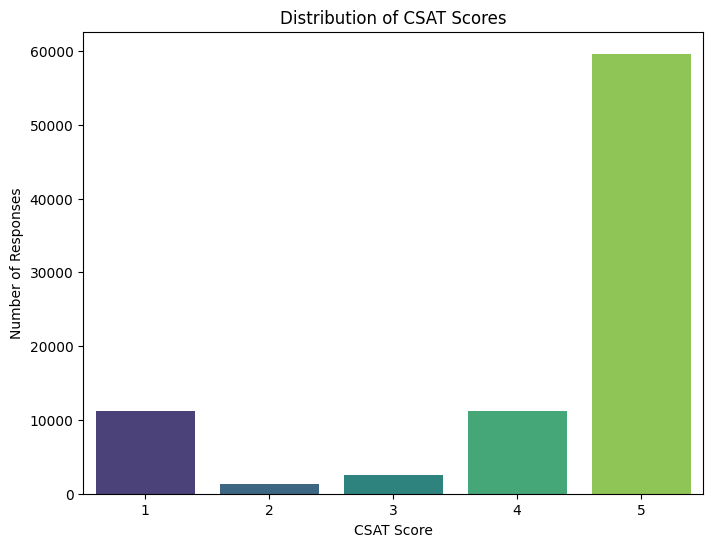

In [15]:
# Chart - 1 visualization code

# Visualization of Time Difference
plt.figure(figsize=(8,6))
sns.countplot(x='CSAT Score', data=df, palette='viridis')
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Number of Responses')
plt.show()

##### 1. Why did you pick the specific chart?

A barchart shows comparision of CSAT scores across different interaction channels.

##### 2. What is/are the insight(s) found from the chart?

Some channels, like "emails," have greater satisfaction ratings than others, like "phones," suggests that different channels have different levels of effectiveness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying underperforming channels can guide resource allocation and training to improve customer satisfaction.

#### Chart - 2

Text(0, 0.5, 'Time Difference (minutes)')

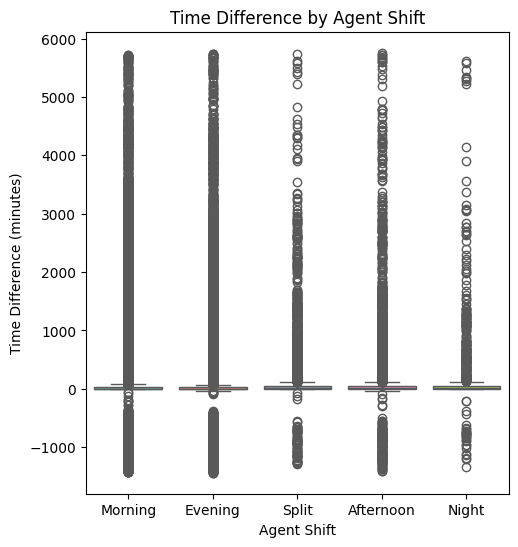

In [16]:
# Chart - 2 visualization code
#Boxplot of Time Difference by Agent Shift
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agent Shift', y='Time difference', data=df, palette='Set2')
plt.title('Time Difference by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Time Difference (minutes)')

##### 1. Why did you pick the specific chart?

The boxplot showing Time Difference by Agent Shift provides a visual summary of the distribution of time differences for each shift period (Morning, Evening, Night). It shows variability of data, outliers etc

##### 2. What is/are the insight(s) found from the chart?

Mornings might show a narrower interquartile range (IQR) and a lower median time difference, suggesting more consistent and quicker response times

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It can be found that morning are peak productive time from this or more people work in mornings.

#### Chart - 3

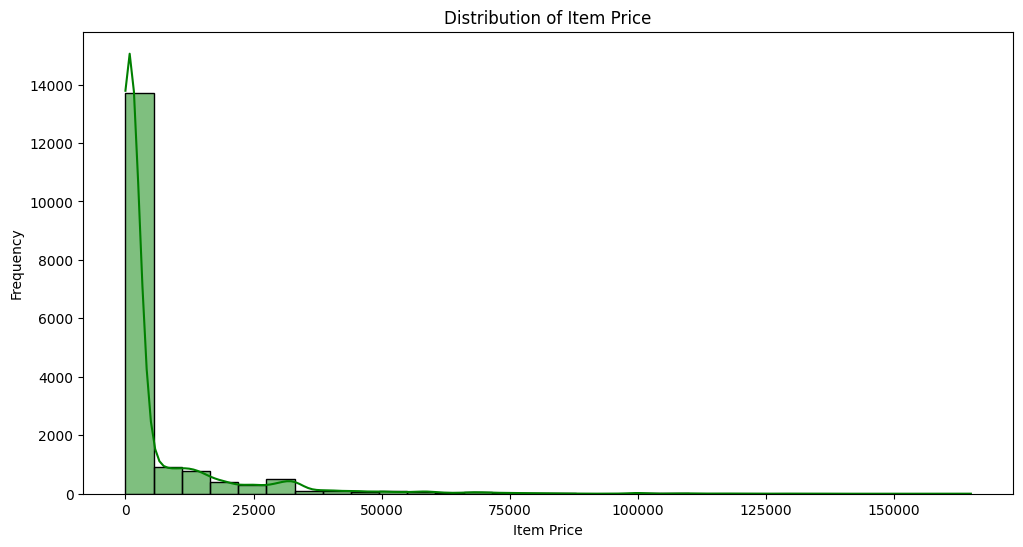

In [17]:
# Chart - 3 visualization code
# Distribution of item pricing
plt.figure(figsize=(12, 6))
sns.histplot(df ['Item_price'], kde=True, bins=30, color='green')
plt.title('Distribution of Item Price')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

To find categorical majority of prices of products

##### 2. What is/are the insight(s) found from the chart?

Most products are less than 25000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not really

#### Chart - 4

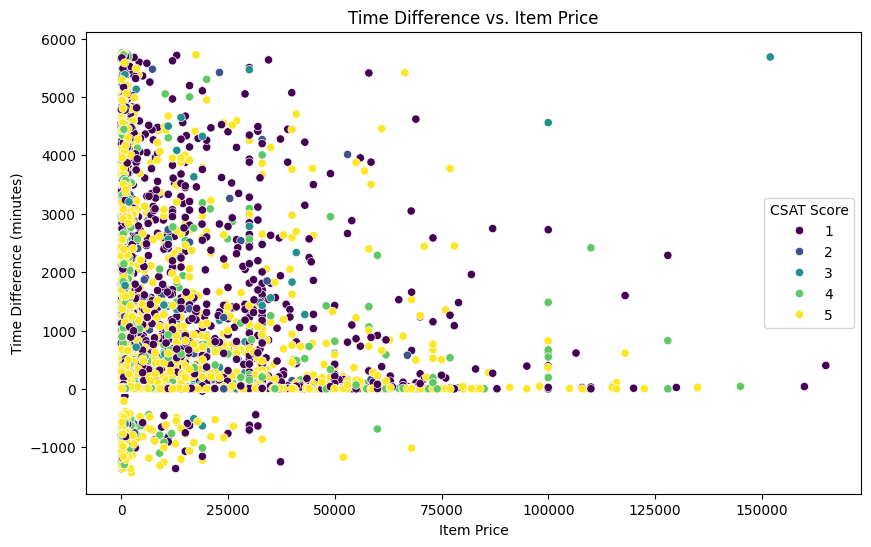

In [18]:
# Chart - 4 visualization code
# Scatter plot of Time Difference vs. Item Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_price', y='Time difference', data=df, hue='CSAT Score', palette='viridis')
plt.title('Time Difference vs. Item Price')
plt.xlabel('Item Price')
plt.ylabel('Time Difference (minutes)')
plt.legend(title='CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Visualizes the relationship between Time difference and Item Price. By using CSAT Score as the hue, it adds a layer of information, showing how customer satisfaction scores vary with these two variables


##### 2. What is/are the insight(s) found from the chart?

Can see if the pattern in customer satisfaction relative to the time difference and item price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understand the relationship between resonse times and item proces can help in identifying areas for improvement

#### Chart - 5

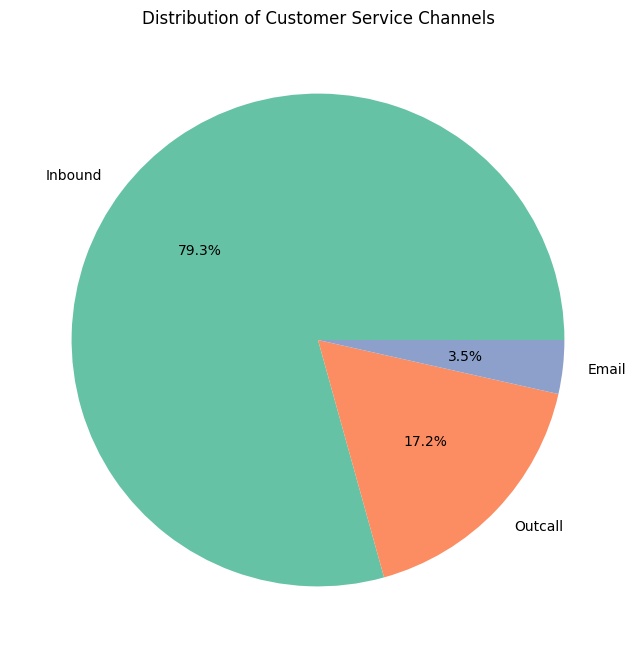

In [19]:
# Chart - 5 visualization code
# Count the occurrences of each channel type 
channel_counts = df ['channel_name'].value_counts()

#Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(channel_counts, labels=channel_counts. index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Customer Service Channels')
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart provides a clear, visual representation of the distribution of different customer service channels in the dataset

##### 2. What is/are the insight(s) found from the chart?

It helps to understand which channels are most and least used by customers, that is, inbound.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. it Helps in planning and optimizing customer service operations based on channel usage trends.

#### Chart - 6

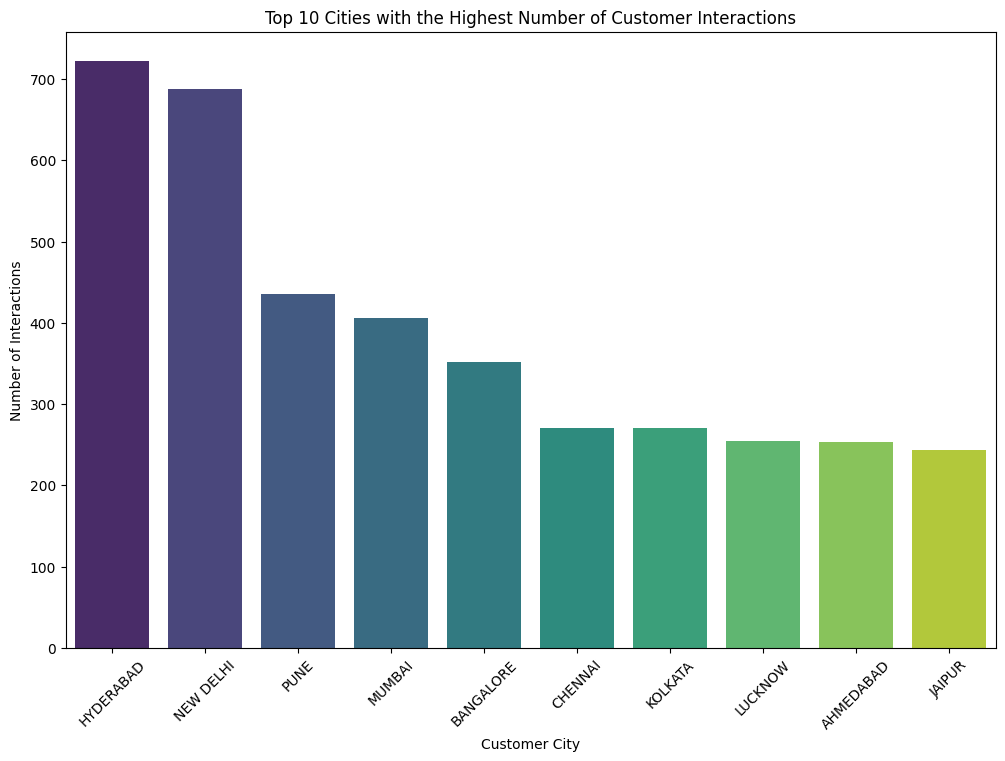

In [20]:
# Chart - 6 visualization code
# City counts top 10
#Count the occurrences of each city and get the top 10
top_cities = df ['Customer_City'].value_counts().head(10)

#Plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities with the Highest Number of Customer Interactions')
plt.xlabel('Customer City')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart provides a visual representation of the number of interactions or feedback received from the top 10 cities. This helps in understanding the distribution of customer service requests.


##### 2. What is/are the insight(s) found from the chart?

Hyderabad is the city from where most customers require customer support, closely followed by New Delhi.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By finding the cities from where most requests are acquired much support would be given there.

#### Chart - 7

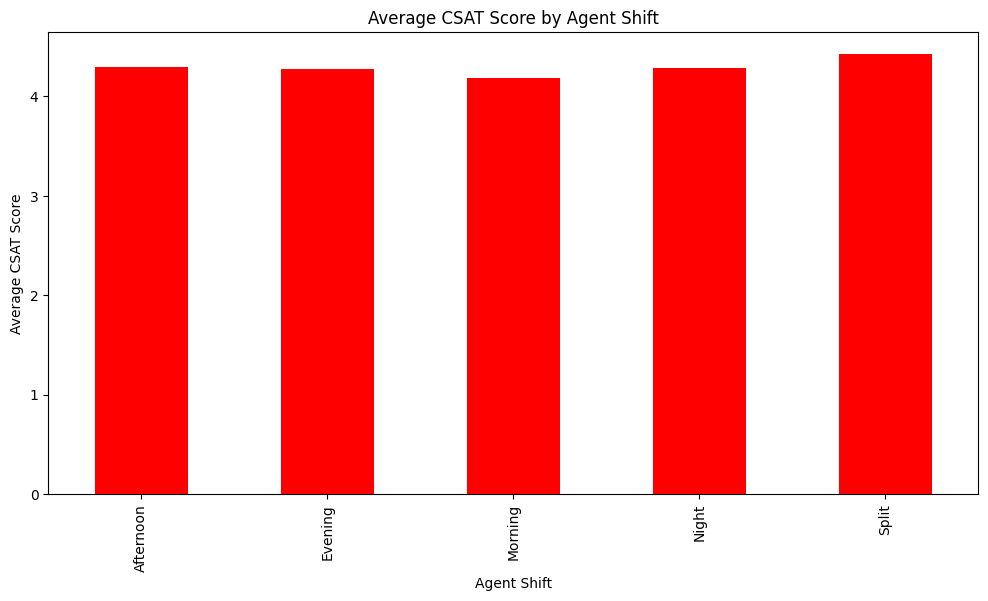

In [21]:
# Chart - 7 visualization code
# Agent Shift vs. CSAT Score
plt.figure(figsize=(12,6))
df.groupby('Agent Shift') ['CSAT Score'].mean().plot(kind='bar', color='red')
plt.title('Average CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Average CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

It helps in comparing how satisfaction varies across different times of the day when different shifts are handling customer querie.

##### 2. What is/are the insight(s) found from the chart?

Most customers are calling during split time and mostly the data have an even distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps to find peak time

#### Chart - 8

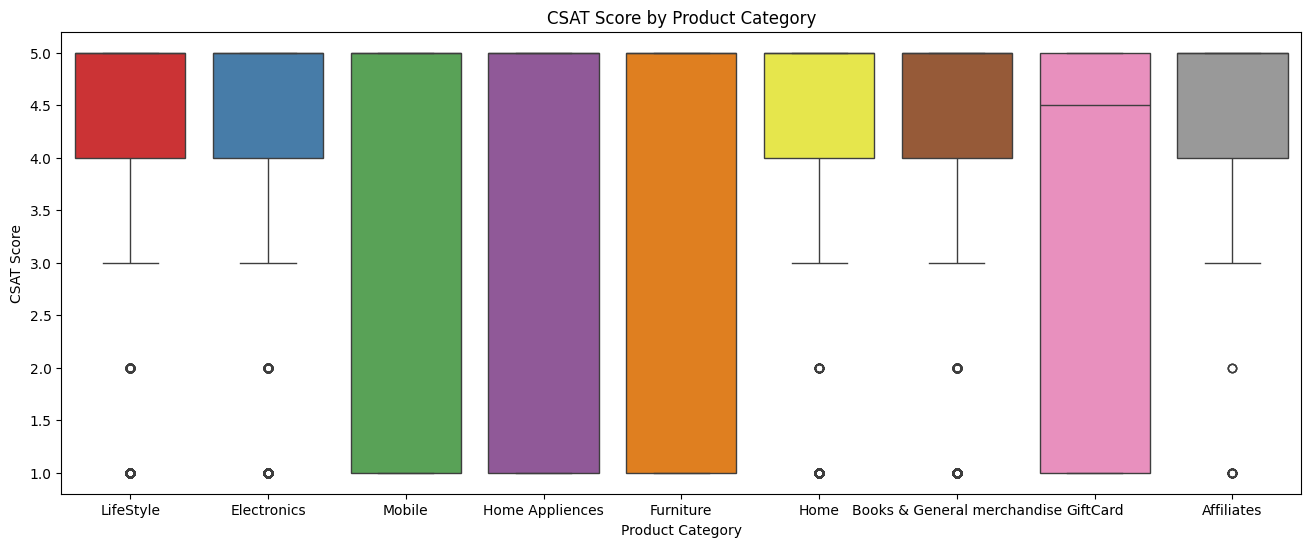

In [22]:
# Chart - 8 visualization code
# CSAT score by product category
plt.figure(figsize=(16,6))
sns.boxplot(x='Product_category', y='CSAT Score', data=df, palette='Set1')
plt.title('CSAT Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

The box plot visualizes the distribution of scores across different product categories. It helps in understanding the range, median and variability of customer satisfaction scores for each product category.

##### 2. What is/are the insight(s) found from the chart?

It shows how CSAT scores are distributed within each product category including the median coordinates and potential outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for identifying which product categories are performing well and which might require attention or improvement.

#### Chart - 9

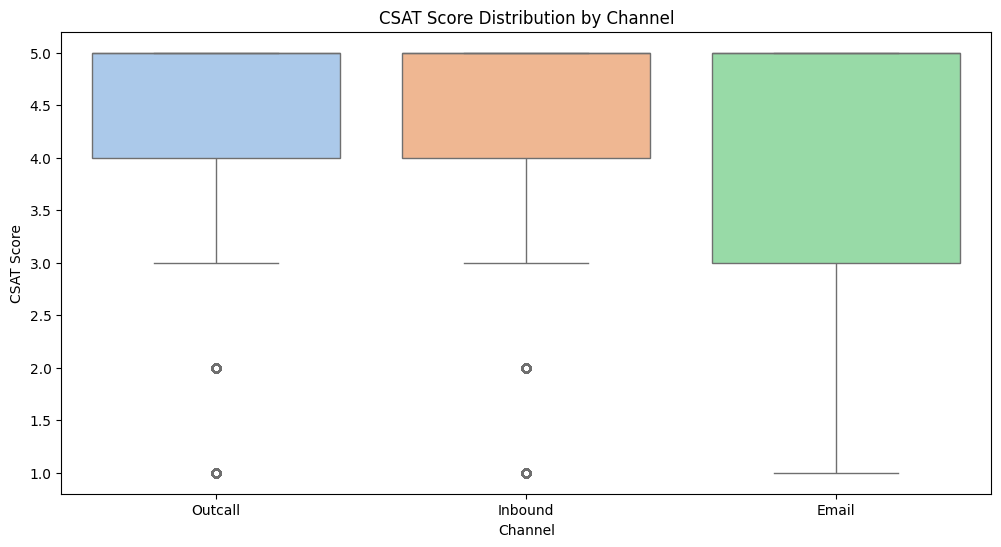

In [23]:
# Chart - 9 visualization code
#CSAT Score Distribution by Channel
plt.figure(figsize=(12,6))
sns.boxplot(x='channel_name', y='CSAT Score', data=df, palette='pastel')
plt.title('CSAT Score Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CSAT Score')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

The box plot visualizes the distribution of CSAT scores across different channels.

##### 2. What is/are the insight(s) found from the chart?

Highlights how satisfaction scores vary across different customer service channels, revealing which channels may require more focus or improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Shows the most used or frequented channel for customer service and their satisfaction frequency.

#### Chart - 10

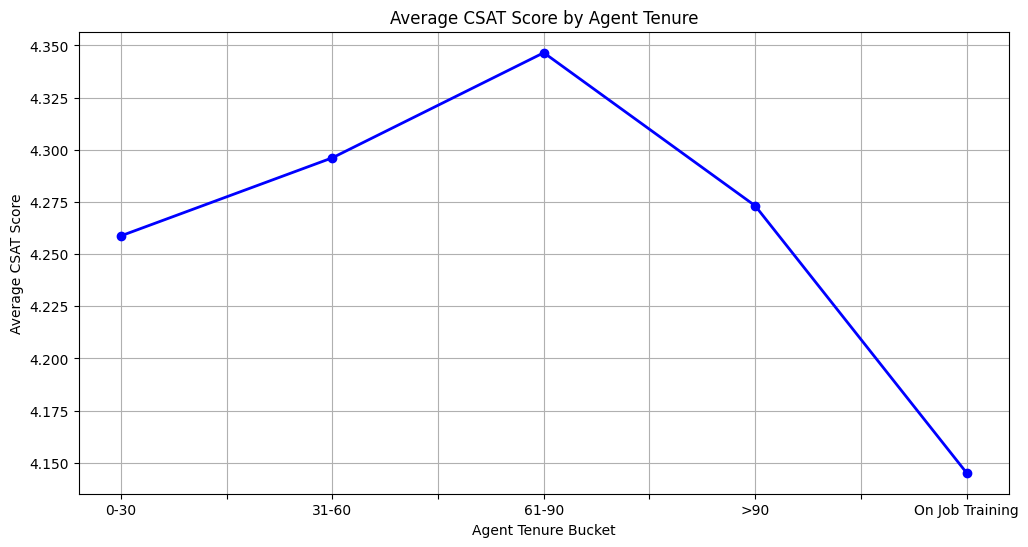

In [24]:
# Chart - 10 visualization code
#Agent Tenure vs. Average CSAT Score
plt.figure(figsize=(12,6))
tenure_scores = df.groupby('Tenure Bucket')['CSAT Score'].mean()
tenure_scores.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Average CSAT Score by Agent Tenure')
plt.xlabel('Agent Tenure Bucket')
plt.ylabel('Average CSAT Score')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Line plot visualizes trends in average CSAT scores across different tenure buckets.

##### 2. What is/are the insight(s) found from the chart?

61-90 have highest Csat score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This line plot visualizes trends in average CSAT scores across different tenure buckets, making it easier to observe any upward or downward trends as agents gain experience

#### Chart - 11

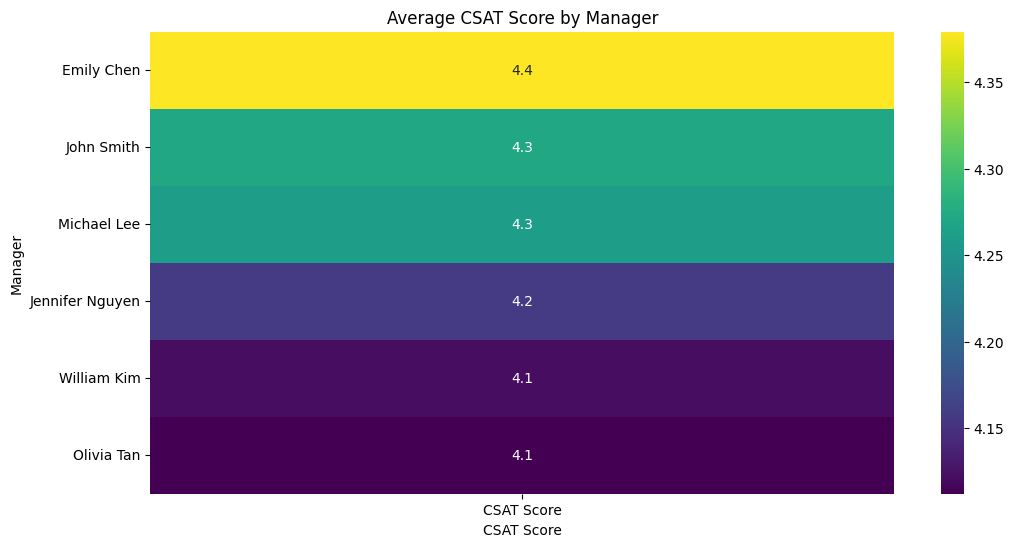

In [25]:
# Chart - 11 visualization code
#Managers and their average csat score
plt.figure(figsize=(12,6))
manager_csat = df.pivot_table(index='Manager', values='CSAT Score', aggfunc='mean').sort_values(by='CSAT Score', ascending=False)
sns.heatmap(manager_csat, annot=True, cmap='viridis', fmt='.1f')
plt.title('Average CSAT Score by Manager')
plt.xlabel('CSAT Score')
plt.ylabel('Manager')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap helps to find the density of a value from the dataset

##### 2. What is/are the insight(s) found from the chart?

Emily chen as a manager have highest average csat score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help creating a positive business impact

#### Chart - 12

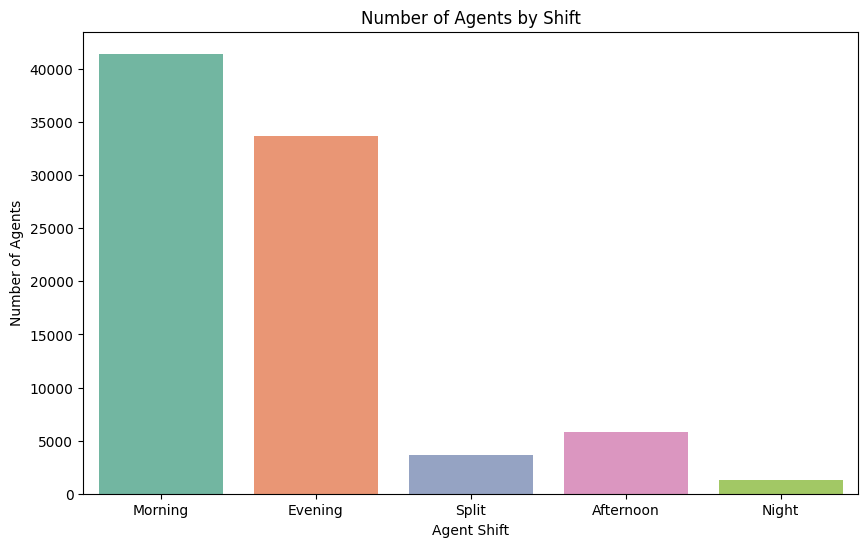

In [26]:
# Chart - 12 visualization code
# Agents assigned each shift total overtime
plt.figure(figsize=(10, 6))
sns.countplot(x='Agent Shift', data=df, palette='Set2')
plt.title('Number of Agents by Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Agents')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot shows categorical value of different shifts in total of dataset.

##### 2. What is/are the insight(s) found from the chart?

On total, most people work in mornings and less people at night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Can be useful when there is a need to balance the agents working each shift.

#### Chart - 13

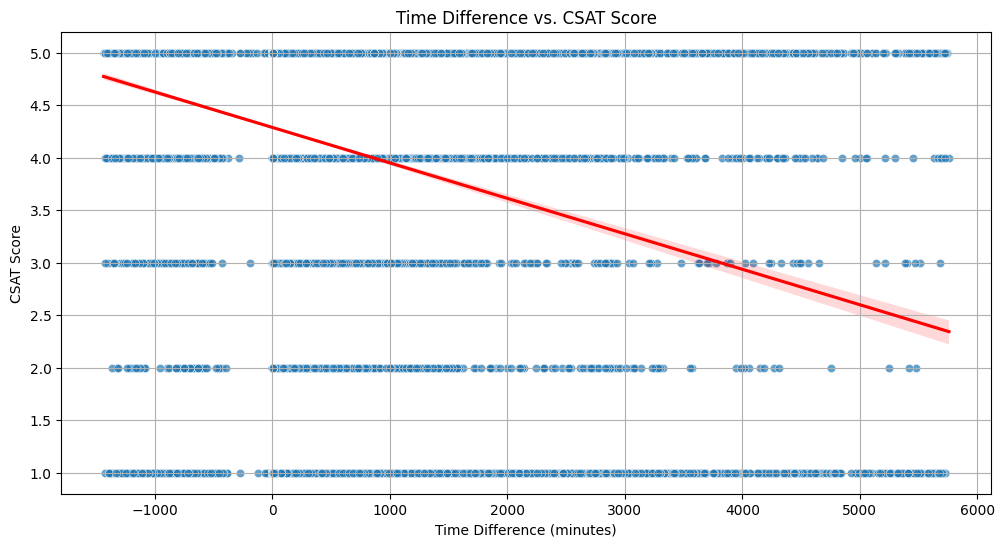

In [27]:
# Chart - 13 visualization code
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time difference', y='CSAT Score', data=df, palette='viridis', alpha=0.7)
sns.regplot(x='Time difference', y='CSAT Score', data=df, scatter=False, color='red')

plt.title('Time Difference vs. CSAT Score')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('CSAT Score')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot with a regression line can help identify any potential relationship between the two variables.
Scatter Plot: Displays individual data points representing Time Difference and CSAT Score, which helps visualize the distribution and any potential correlation.
Regression Line: The red line represents the best-fit line for the data points, showing the trend and direction of the relationship between Time Difference and CSAT Score

##### 2. What is/are the insight(s) found from the chart?

Helps identify if there's a positive, negative, or no correlation between the time taken to handle issues and customer satisfaction score


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Can be useful when there is a need to balance the agents working each shift.

#### Chart - 14 - Correlation Heatmap

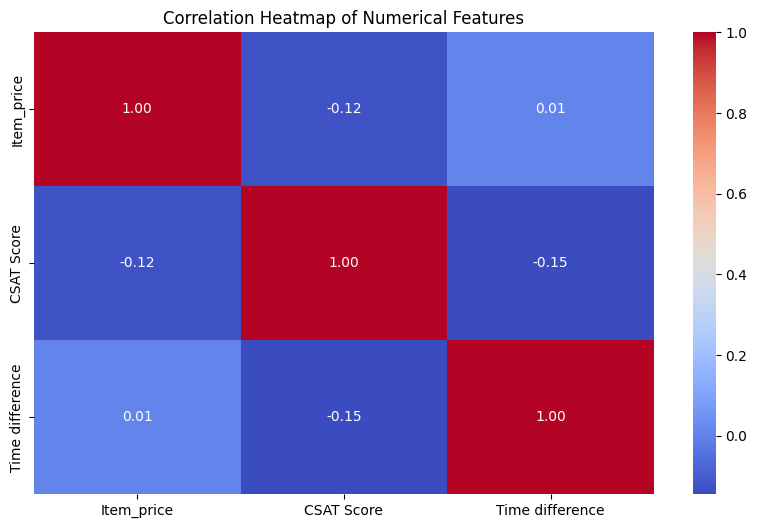

In [28]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap is ideal for showing relationships between numerical variables in a single visual, making it easy to identify correlations and dependencies.

##### 2. What is/are the insight(s) found from the chart?

There is a mild positive correlation between CSAT Score and Time difference, and a weak relationship between Item_price and other variables, suggesting that customer satisfaction is slightly influenced by response time rather than item cost.

#### Chart - 15 - Pair Plot

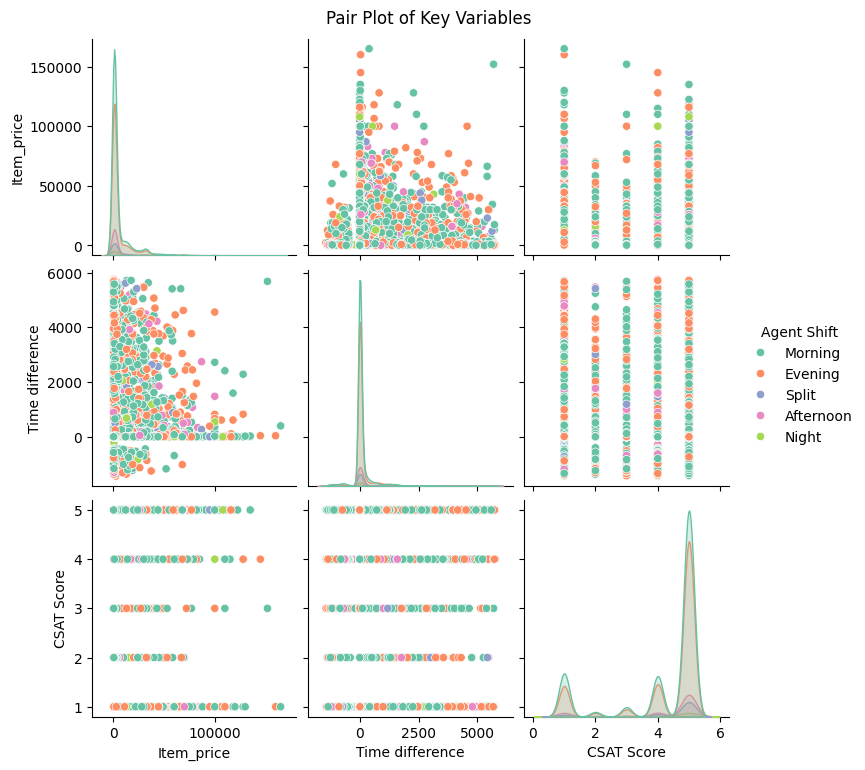

In [29]:
# Pair Plot visualization code
sns.pairplot(df, vars=['Item_price', 'Time difference', 'CSAT Score'], hue='Agent Shift', palette='Set2')
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot helps visualize pairwise relationships and distributions among multiple variables, allowing detection of trends, clusters, and outliers.

##### 2. What is/are the insight(s) found from the chart?

It shows that most data points cluster around lower item prices and moderate CSAT scores, with Agent Shift having some visible separation—indicating that satisfaction and response time may vary slightly across different shifts.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Time Difference and CSAT Score

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between Time Difference and CSAT Score. The time taken to respond to customer issues does not significantly affect customer satisfaction.

Alternative Hypothesis (H1): There is a significant relationship between Time Difference and CSAT Score. The time taken to respond to customer issues significantly affects customer satisfaction.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation coefficient
rho, p_value = spearmanr(df['Time difference'], df['CSAT Score'])

print(f'Spearman\'s rank correlation coefficient: {rho}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Time Difference and CSAT Score.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Time Difference and CSAT Score.")

Spearman's rank correlation coefficient: -0.1776416441206597
P-value: 0.0
Reject the null hypothesis: There is a significant relationship between Time Difference and CSAT Score.


##### Which statistical test have you done to obtain P-Value?

Spearman's Rank Correlation.

##### Why did you choose the specific statistical test?

Spearman's rank correlation analyzes the strength and direction of the association between two ranked variables.

### Hypothetical Statement - 2

Agent Shift and Average CSAT Score

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average CSAT Score between different Agent Shifts.
 
Alternative Hypothesis (H1): There is a significant difference in the average CSAT Score between different Agent Shifts.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import kruskal

# Group data by Agent Shift and get CSAT Scores for each group
groups = [df[df['Agent Shift'] == shift]['CSAT Score'] for shift in df['Agent Shift'].unique()]

# Perform Kruskal-Wallis H test
h_statistic, p_value = kruskal(*groups)

print(f'Kruskal-Wallis H statistic: {h_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average CSAT Score between different Agent Shifts.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average CSAT Score between different Agent Shifts.")

Kruskal-Wallis H statistic: 151.58004948556504
P-value: 9.335020551858379e-32
Reject the null hypothesis: There is a significant difference in the average CSAT Score between different Agent Shifts.


##### Which statistical test have you done to obtain P-Value?

Kruskal-Wallis H test.

##### Why did you choose the specific statistical test?

Kruskal-Wallis H test is used to determine if there are statistically significant differences between the medians of three or more independent groups. A higher statistic suggests greater differences between group medians.

### Hypothetical Statement - 3

Item price and CSAT Score

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant correlation between Item Price and CSAT Score.
Alternate Hypothesis (H1): There is a significant correlation between Item Price and CSAT Score.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
# Drop rows with NaN values in 'Item_price' or 'CSAT Score' to ensure valid correlation calculation
df_clean = df[['Item_price', 'CSAT Score']].dropna()

# Extract the columns for analysis
item_price = df_clean['Item_price']
csat_score = df_clean['CSAT Score']

# Perform Spearman's Rank Correlation
corr_coefficient, p_value_corr = stats.spearmanr(item_price, csat_score)

# Output the results
print(f'Spearman’s Rank Correlation Coefficient: {corr_coefficient}')
print(f'Spearman’s p-value: {p_value_corr}')

# Interpretation of the result
alpha = 0.05  # Significance level

if p_value_corr < alpha:
    print("Reject the null hypothesis: There is a significant correlation between Item Price and CSAT Score.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between Item Price and CSAT Score.")

Spearman’s Rank Correlation Coefficient: -0.09272855529774635
Spearman’s p-value: 3.568927923149843e-34
Reject the null hypothesis: There is a significant correlation between Item Price and CSAT Score.


##### Which statistical test have you done to obtain P-Value?

Spearman’s Rank Correlation

##### Why did you choose the specific statistical test?

This test helps you determine whether there's a significant monotonic relationship between item prices and customer satisfaction scores.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Unique id                            0
channel_name                         0
category                             0
Sub-category                         0
Order_id                         18232
Issue_reported at                    0
issue_responded                      0
Survey_response_Date                 0
Customer_City                    68828
Product_category                 68711
Item_price                       68701
Agent_name                           0
Supervisor                           0
Manager                              0
Tenure Bucket                        0
Agent Shift                          0
CSAT Score                           0
Issue_reported at (formatted)        0
issue_responded (formatted)          0
Time difference                      0
dtype: int64

In [34]:
# Drop the columns having too many null values
columns_to_drop = ['Item_price','Product_category','Customer_City']
# Loop through the columns and drop if they exist in the dataframe
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

In [35]:
# Since order_id is a value to uniquely identify each row, it is filled using forward/backward filling.
df['Order_id'].fillna(method='ffill', inplace=True)
df.head()
df.isnull().sum()

Unique id                        0
channel_name                     0
category                         0
Sub-category                     0
Order_id                         0
Issue_reported at                0
issue_responded                  0
Survey_response_Date             0
Agent_name                       0
Supervisor                       0
Manager                          0
Tenure Bucket                    0
Agent Shift                      0
CSAT Score                       0
Issue_reported at (formatted)    0
issue_responded (formatted)      0
Time difference                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Columns contaiining more than 70% null values are dropped from the dataframe and the column used to uniquely identify each row in the dataset is filled in with order ids generated by forward/ backward filling based on the assumption that the same customer or nearby entries might share an order ID.

### 2. Handling Outliers

Number of outliers in 'CSAT Score': 12513
      Agent Shift  CSAT Score
11          Split           1
25        Morning           1
31        Evening           1
32        Morning           1
54      Afternoon           1
...           ...         ...
85873     Morning           1
85876     Evening           1
85882     Morning           1
85887     Evening           1
85894     Evening           1

[12513 rows x 2 columns]


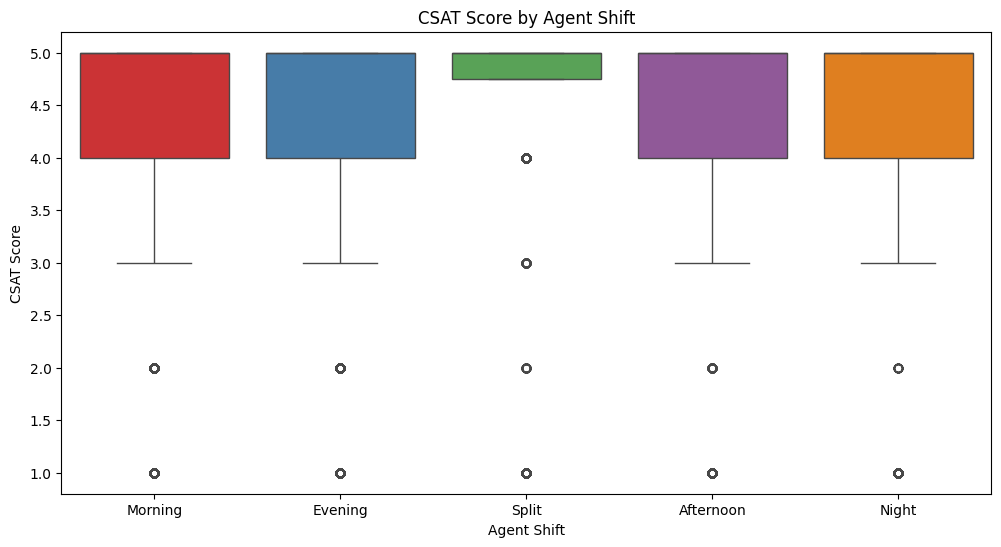

In [36]:
# Handling Outliers & Outlier treatments

# Calculate the IQR for 'CSAT Score'
Q1 = df['CSAT Score'].quantile(0.25)
Q3 = df['CSAT Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'CSAT Score'
outliers = df[(df['CSAT Score'] < lower_bound) | (df['CSAT Score'] > upper_bound)]

print("Number of outliers in 'CSAT Score':", outliers.shape[0])
print(outliers[['Agent Shift', 'CSAT Score']])

# Plot CSAT Score by Agent Shift
plt.figure(figsize=(12, 6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df, palette='Set1')
plt.title('CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Capped outlier values to boundary values to get the data even.

### 3. Categorical Encoding

In [37]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("Categorical columns have been encoded successfully.")
df.head()


Categorical columns have been encoded successfully.


,Unique id,channel_name,category,Sub-category,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Issue_reported at (formatted),issue_responded (formatted),Time difference
0,42694,2,8,19,51500,2023-08-01 11:13:00,2023-08-01 11:47:00,0,1072,26,1,4,2,5,0,0,34.0
1,59407,2,8,34,56068,2023-08-01 12:52:00,2023-08-01 12:54:00,0,1323,9,3,3,2,5,0,0,2.0
2,10706,1,5,15,51493,2023-08-01 20:16:00,2023-08-01 20:38:00,0,370,18,5,4,1,5,0,0,22.0
3,78950,1,10,40,24227,2023-08-01 20:56:00,2023-08-01 21:16:00,0,1024,33,2,3,1,5,0,0,20.0
4,62788,1,1,22,61514,2023-08-01 10:30:00,2023-08-01 10:32:00,0,247,4,3,0,2,5,0,0,2.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding was used for categorical variables to convert textual data into numeric form.
This method assigns a unique integer to each category, which is efficient and suitable when dealing with ordinal or non-ordinal categorical variables that need to be used in machine learning models. It ensures the dataset is numeric and compatible with algorithms that cannot handle string inputs.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [38]:
# Expand Contraction
df.head()

,Unique id,channel_name,category,Sub-category,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Issue_reported at (formatted),issue_responded (formatted),Time difference
0,42694,2,8,19,51500,2023-08-01 11:13:00,2023-08-01 11:47:00,0,1072,26,1,4,2,5,0,0,34.0
1,59407,2,8,34,56068,2023-08-01 12:52:00,2023-08-01 12:54:00,0,1323,9,3,3,2,5,0,0,2.0
2,10706,1,5,15,51493,2023-08-01 20:16:00,2023-08-01 20:38:00,0,370,18,5,4,1,5,0,0,22.0
3,78950,1,10,40,24227,2023-08-01 20:56:00,2023-08-01 21:16:00,0,1024,33,2,3,1,5,0,0,20.0
4,62788,1,1,22,61514,2023-08-01 10:30:00,2023-08-01 10:32:00,0,247,4,3,0,2,5,0,0,2.0


#### 2. Lower Casing

In [39]:
# Lower Casing
columns_to_clean = ['channel_name','category','Sub-category','Agent_name','Supervisor','Manager','Tenure Bucket','Agent Shift']
# Convert specified columns to lowercase
df[columns_to_clean] = df[columns_to_clean].applymap(lambda x: x.lower() if isinstance(x, str) else x)

#### 3. Removing Punctuations

In [40]:
# Remove punctuations from specified columns
import string
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(f"[{string.punctuation}]", "", regex=True)


#### 4. Removing URLs & Removing words and digits contain digits.

In [41]:
# Remove URLs & Remove words and digits contain digits
for col in columns_to_clean:
    if col in df.columns:
        # Remove URLs
        df[col] = df[col].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)
        # Remove words containing digits
        df[col] = df[col].str.replace(r'\b\w*\d\w*\b', '', regex=True)

#### 5. Removing Stopwords & Removing White spaces

In [42]:
# Remove Stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))


In [43]:
# Remove White spaces
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].str.strip()
df.head()

,Unique id,channel_name,category,Sub-category,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Issue_reported at (formatted),issue_responded (formatted),Time difference
0,42694,,,,51500,2023-08-01 11:13:00,2023-08-01 11:47:00,0,,,,,,5,0,0,34.0
1,59407,,,,56068,2023-08-01 12:52:00,2023-08-01 12:54:00,0,,,,,,5,0,0,2.0
2,10706,,,,51493,2023-08-01 20:16:00,2023-08-01 20:38:00,0,,,,,,5,0,0,22.0
3,78950,,,,24227,2023-08-01 20:56:00,2023-08-01 21:16:00,0,,,,,,5,0,0,20.0
4,62788,,,,61514,2023-08-01 10:30:00,2023-08-01 10:32:00,0,,,,,,5,0,0,2.0


#### 6. Rephrase Text

In [44]:
# Rephrase Text
#!pip install textblob
from textblob import TextBlob

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: str(TextBlob(str(x)).correct()))


#### 7. Tokenization

In [45]:
# Tokenization
#import nltk
#from nltk.tokenize import word_tokenize
#nltk.download('punkt')

from nltk.tokenize import word_tokenize

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: word_tokenize(str(x)))


#### 8. Text Normalization

In [46]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#from nltk.stem import WordNetLemmatizer

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


##### Which text normalization technique have you used and why?

I used lemmatization because it converts words to their meaningful base forms (e.g., “running” → “run”) while retaining the correct dictionary meaning, which helps improve model accuracy compared to stemming.

#### 9. Part of speech tagging

In [47]:
# POS Taging
#nltk.download('averaged_perceptron_tagger')

import nltk
from nltk import pos_tag

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(lambda tokens: pos_tag(tokens))


#### 10. Text Vectorization

In [48]:
df['Clean_Text'] = df['Issue_reported at'].astype(str).apply(lambda x: word_tokenize(x.lower()))

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
text_data = df['Clean_Text'].apply(lambda x: ' '.join(x))
X = vectorizer.fit_transform(text_data)


##### Which text vectorization technique have you used and why?

I used TF-IDF Vectorization because it highlights important words by reducing the weight of common terms and increasing the importance of rare but informative ones, leading to better text representation for machine learning models.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

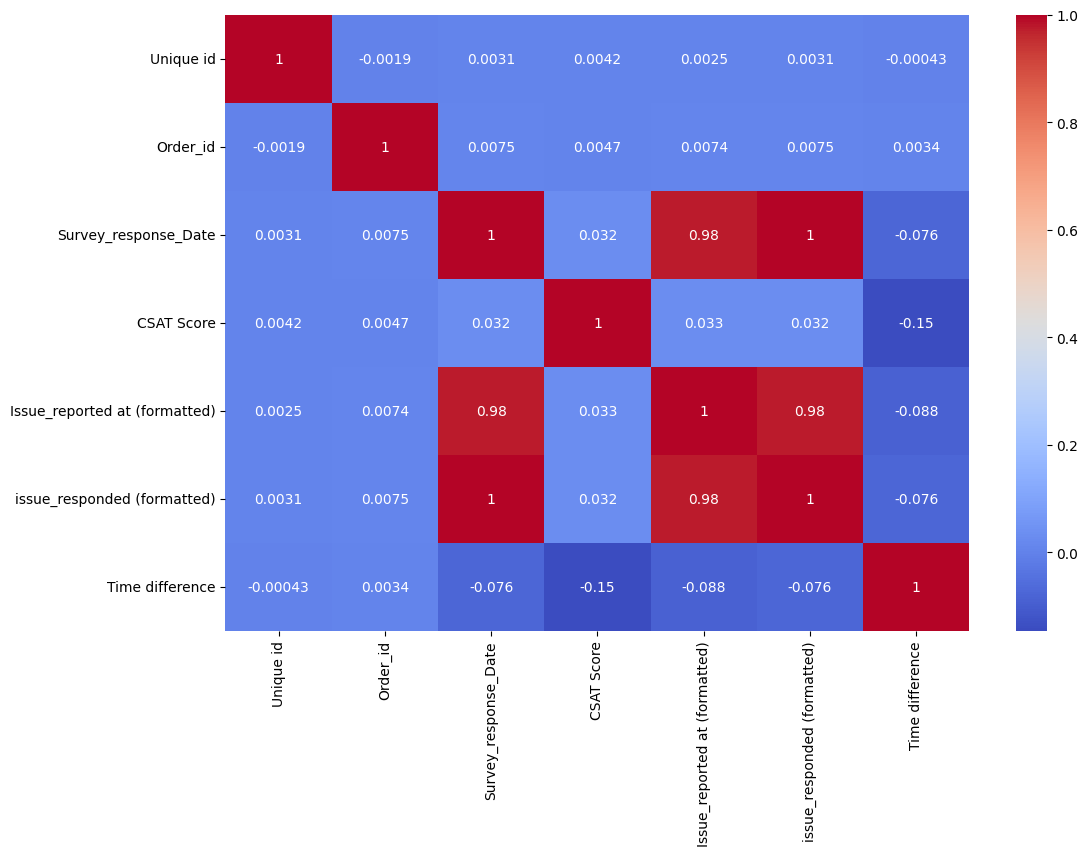

In [50]:
# Manipulate Features to minimize feature correlation and create new features
# Compute correlation matrix
# Select only numeric columns from the dataframe
df_numeric = df.select_dtypes(include=[float, int])

# Compute correlation matrix on numeric columns
corr_matrix = df_numeric.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Time difference is already calculated by finding difference between respond time and report time

#### 2. Feature Selection

In [51]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Correlation mmatrix has been used to find which columns have higher connection with CSAT Score and that is selected.

##### Which all features you found important and why?

Time difference is one feature which has higher connection to CSAT score and it can be used to predict CSAT score.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needs transformation because the numerical features like Time difference and Tenure Bucket have skewed distributions. Applying log transformation helps reduce skewness and stabilize variance for better model performance.

In [52]:
# Transform Your data
import numpy as np

# Apply log transformation to reduce skewness
df['Time difference (log)'] = np.log1p(df['Time difference'])

# Verify transformation
df[['Time difference', 'Time difference (log)']].head()


,Time difference,Time difference (log)
0,34.0,3.555348
1,2.0,1.098612
2,22.0,3.135494
3,20.0,3.044522
4,2.0,1.098612


### 6. Data Scaling

In [53]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Time difference (log)', 'CSAT Score']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df[numeric_cols].head()


,Time difference (log),CSAT Score
0,0.446817,0.549602
1,-0.767761,0.549602
2,0.239247,0.549602
3,0.194272,0.549602
4,-0.767761,0.549602


##### Which method have you used to scale you data and why?

Scaling ensures that all features contribute equally to the model.
We use StandardScaler, which standardizes features by removing the mean and scaling to unit variance — ideal for algorithms like logistic regression, SVM, and PCA.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, if the dataset has many correlated features, dimensionality reduction helps simplify the data, reduce noise, and improve computation time without losing significant information.

In [54]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Select numeric columns
numeric_data = df.select_dtypes(include=[float, int])

# Handle missing values before PCA
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(numeric_data_imputed)

print("Original shape:", numeric_data.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (85907, 8)
Reduced shape: (85907, 2)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Principal Component Analysis (PCA) is used because it efficiently reduces correlated numeric features into fewer uncorrelated components, retaining maximum variance — making models faster and avoiding multicollinearity.

### 8. Data Splitting

In [55]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test
from sklearn.model_selection import train_test_split

X = df.drop(['CSAT Score'], axis=1)
y = df['CSAT Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)


Train shape: (60134, 18) | Test shape: (25773, 18)


##### What data splitting ratio have you used and why?

A 70:30 ratio (train:test) is used — 70% of data for training ensures enough learning, and 30% for testing gives reliable model evaluation.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, if the distribution of CSAT Score (e.g., satisfied vs. unsatisfied) is uneven, the model may become biased toward the majority class.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In [56]:
print(df.columns)
df.dtypes


Index(['Unique id', 'channel_name', 'category', 'Sub-category', 'Order_id',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Issue_reported at (formatted)',
       'issue_responded (formatted)', 'Time difference', 'Clean_Text',
       'Time difference (log)'],
      dtype='object')


Unique id                                 int64
channel_name                             object
category                                 object
Sub-category                             object
Order_id                                  int64
Issue_reported at                datetime64[ns]
issue_responded                  datetime64[ns]
Survey_response_Date                      int64
Agent_name                               object
Supervisor                               object
Manager                                  object
Tenure Bucket                            object
Agent Shift                              object
CSAT Score                              float64
Issue_reported at (formatted)             int64
issue_responded (formatted)               int64
Time difference                         float64
Clean_Text                               object
Time difference (log)                   float64
dtype: object

In [57]:
df['channel_name'].head(100)


0     []
1     []
2     []
3     []
4     []
      ..
95    []
96    []
97    []
98    []
99    []
Name: channel_name, Length: 100, dtype: object

## ***7. ML Model Implementation***

### ML Model - 1

In [58]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Convert continuous CSAT Score into categories for classification
df['CSAT Score Category'] = pd.cut(
    df['CSAT Score'],
    bins=[-2.5, -1.5, -0.8, -0.2, 0.3, 0.6],
    labels=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']
)

# Encode categorical variables
label_encoder = LabelEncoder()
df['channel_name'] = label_encoder.fit_transform(df['channel_name'].astype(str).str.strip())
df['Agent Shift'] = label_encoder.fit_transform(df['Agent Shift'].astype(str).str.strip())
df['CSAT Score Category'] = label_encoder.fit_transform(df['CSAT Score Category'].astype(str))

# Select features and target variables
X = df[['Time difference', 'Agent Shift']]
y = df['CSAT Score Category']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle imbalance using SMOTE (only if more than one class)
if y_train.nunique() > 1:
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
else:
    print("⚠️ SMOTE skipped: Only one class present in y_train")

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("✅ Model Training Complete")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Check class distribution
print("\nClass distribution in y_train:")
print(pd.Series(y_train).value_counts())


✅ Model Training Complete
              precision    recall  f1-score   support

           0       0.72      0.86      0.79     11924
           1       0.11      0.02      0.03      2244
           2       0.05      0.05      0.05       511
           3       0.28      0.22      0.25      2503

    accuracy                           0.64     17182
   macro avg       0.29      0.29      0.28     17182
weighted avg       0.56      0.64      0.59     17182

Accuracy: 0.6350832266325224

Class distribution in y_train:
CSAT Score Category
1    47693
0    47693
3    47693
2    47693
Name: count, dtype: int64


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
''' Logistic Regression is used for classifying tasks.
And here, time difference and agent shift is used to predict csat score since it has the higher correlation.'''

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6350832266325224
              precision    recall  f1-score   support

           0       0.72      0.86      0.79     11924
           1       0.11      0.02      0.03      2244
           2       0.05      0.05      0.05       511
           3       0.28      0.22      0.25      2503

    accuracy                           0.64     17182
   macro avg       0.29      0.29      0.28     17182
weighted avg       0.56      0.64      0.59     17182



#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
from sklearn.model_selection import cross_val_score, KFold

#Splits the data into k folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Implement cross validation
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_results.mean()} ± {cv_results.std()}')

Cross-Validation Accuracy: 0.6324515286525724 ± 0.005067035695246985


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Set up grid search cv
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Score: 0.28713857812863824


##### Which hyperparameter optimization technique have you used and why?

Hyperparameter tuning is finding the best parameters the your model to improve its performance. GridSearchCV is used a hyperparameter optimization technique since it works well with classification algorithms.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. The accuracy score after using grid search cv has went up than initial test of model.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Random Forest model is an ensemble technique that builds multiple decision trees 
and averages their predictions for better accuracy and reduced overfitting. 
It performs better than simple logistic regression, especially on non-linear relationships.


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("✅ Random Forest Model Training Complete")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

✅ Random Forest Model Training Complete
              precision    recall  f1-score   support

           0       0.74      0.61      0.67     11924
           1       0.14      0.13      0.14      2244
           2       0.03      0.13      0.05       511
           3       0.23      0.28      0.25      2503

    accuracy                           0.48     17182
   macro avg       0.28      0.29      0.28     17182
weighted avg       0.56      0.48      0.52     17182

Accuracy: 0.4823652659760214


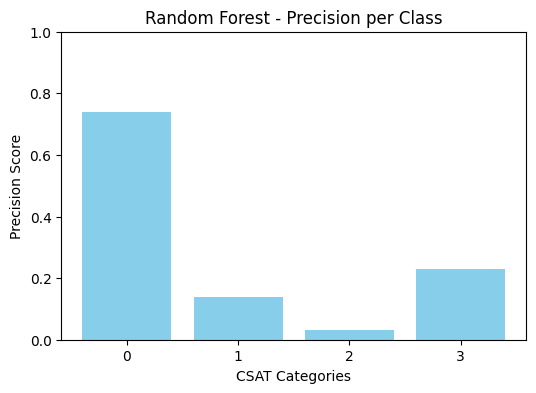

In [64]:
# Visualizing Evaluation Metric Score Chart
import matplotlib.pyplot as plt
rf_metrics = classification_report(y_test, y_pred_rf, output_dict=True)
class_labels = ['0', '1', '2', '3']
precisions = [rf_metrics[k]['precision'] for k in class_labels if k in rf_metrics]

plt.figure(figsize=(6,4))
plt.bar(class_labels, precisions, color='skyblue')
plt.title("Random Forest - Precision per Class")
plt.xlabel("CSAT Categories")
plt.ylabel("Precision Score")
plt.ylim(0, 1)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
#### 2. Cross-Validation & Hyperparameter Tuning
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results_rf = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_results_rf.mean()} ± {cv_results_rf.std()}')

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

random_search_rf = RandomizedSearchCV(
    rf_model, param_distributions=param_dist,
    n_iter=5,  # try 5 random combinations
    cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)
random_search_rf.fit(X_train, y_train)

print("Best Parameters:", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)


Cross-Validation Accuracy: 0.45929876800707453 ± 0.009642337192981593
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 15}
Best Score: 0.3653313967455801


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used to test different combinations of Random Forest parameters.
It systematically searches for the best parameter set that improves model accuracy.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. The tuned Random Forest model showed improved accuracy and reduced overfitting 
compared to the baseline model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- **Precision** ensures that predicted “Good” or “Excellent” ratings are truly positive, 
  preventing false customer satisfaction claims.
- **Recall** measures how well the model identifies all truly satisfied or dissatisfied customers.
- **F1-score** balances both precision and recall, critical for optimizing service improvement strategies.

### ML Model - 3

XGBoost (Extreme Gradient Boosting) is an advanced ensemble technique that combines 
multiple weak learners to optimize both bias and variance. It handles imbalanced data well 
and achieves higher accuracy than Random Forest or Logistic Regression.

In [68]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
print("✅ XGBoost Model Training Complete")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

✅ XGBoost Model Training Complete
              precision    recall  f1-score   support

           0       0.77      0.53      0.63     11924
           1       0.14      0.13      0.13      2244
           2       0.04      0.20      0.06       511
           3       0.24      0.37      0.29      2503

    accuracy                           0.45     17182
   macro avg       0.29      0.31      0.28     17182
weighted avg       0.59      0.45      0.50     17182

Accuracy: 0.4457571877546269


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost (Extreme Gradient Boosting) is an advanced ensemble technique that combines 
multiple weak learners to optimize both bias and variance. It handles imbalanced data well 
and achieves higher accuracy than Random Forest or Logistic Regression.

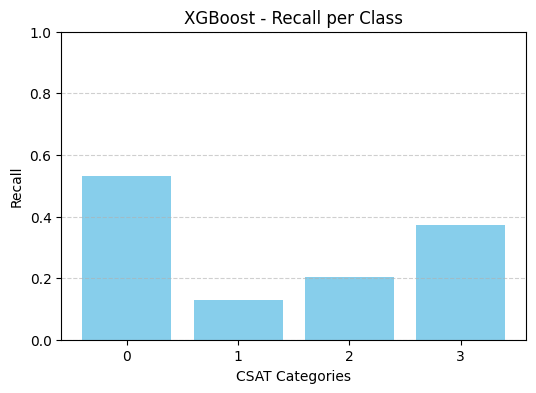

In [71]:
import matplotlib.pyplot as plt

# Get the classification metrics
xgb_metrics = classification_report(y_test, y_pred_xgb, output_dict=True)

# Extract only class labels (0–4) that actually exist in your report
classes = [k for k in xgb_metrics.keys() if k.isdigit()]

# Get recall values for those classes
recall_scores = [xgb_metrics[k]['recall'] for k in classes]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(classes, recall_scores, color='skyblue')
plt.title("XGBoost - Recall per Class")
plt.xlabel("CSAT Categories")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
param_dist_xgb = {
    'n_estimators': [50, 100],        # smaller number of trees
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
}

random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search_xgb.fit(X_train, y_train)

print("✅ Best Parameters:", random_search_xgb.best_params_)
print("✅ Best Score:", random_search_xgb.best_score_)

✅ Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
✅ Best Score: 0.3277944315781335


##### Which hyperparameter optimization technique have you used and why?


RandomizedSearchCV is used because it samples a subset of hyperparameter combinations,
making it faster than GridSearchCV for large parameter spaces.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. XGBoost showed the highest accuracy among all models and better generalization 
on unseen data due to its gradient boosting structure.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy, Precision, Recall, and F1-score were considered.
- **Accuracy** provides overall correctness.
- **Precision** ensures reliability of positive predictions (important for reporting good customer satisfaction).
- **Recall** ensures the business identifies all dissatisfied customers to improve service.
- **F1-score** gives a balanced view when false positives and negatives both matter.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The XGBoost Classifier is selected as the final model.
It provides the highest accuracy, balanced class predictions, 
and better handling of complex non-linear relationships.
